In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv("data.csv")

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

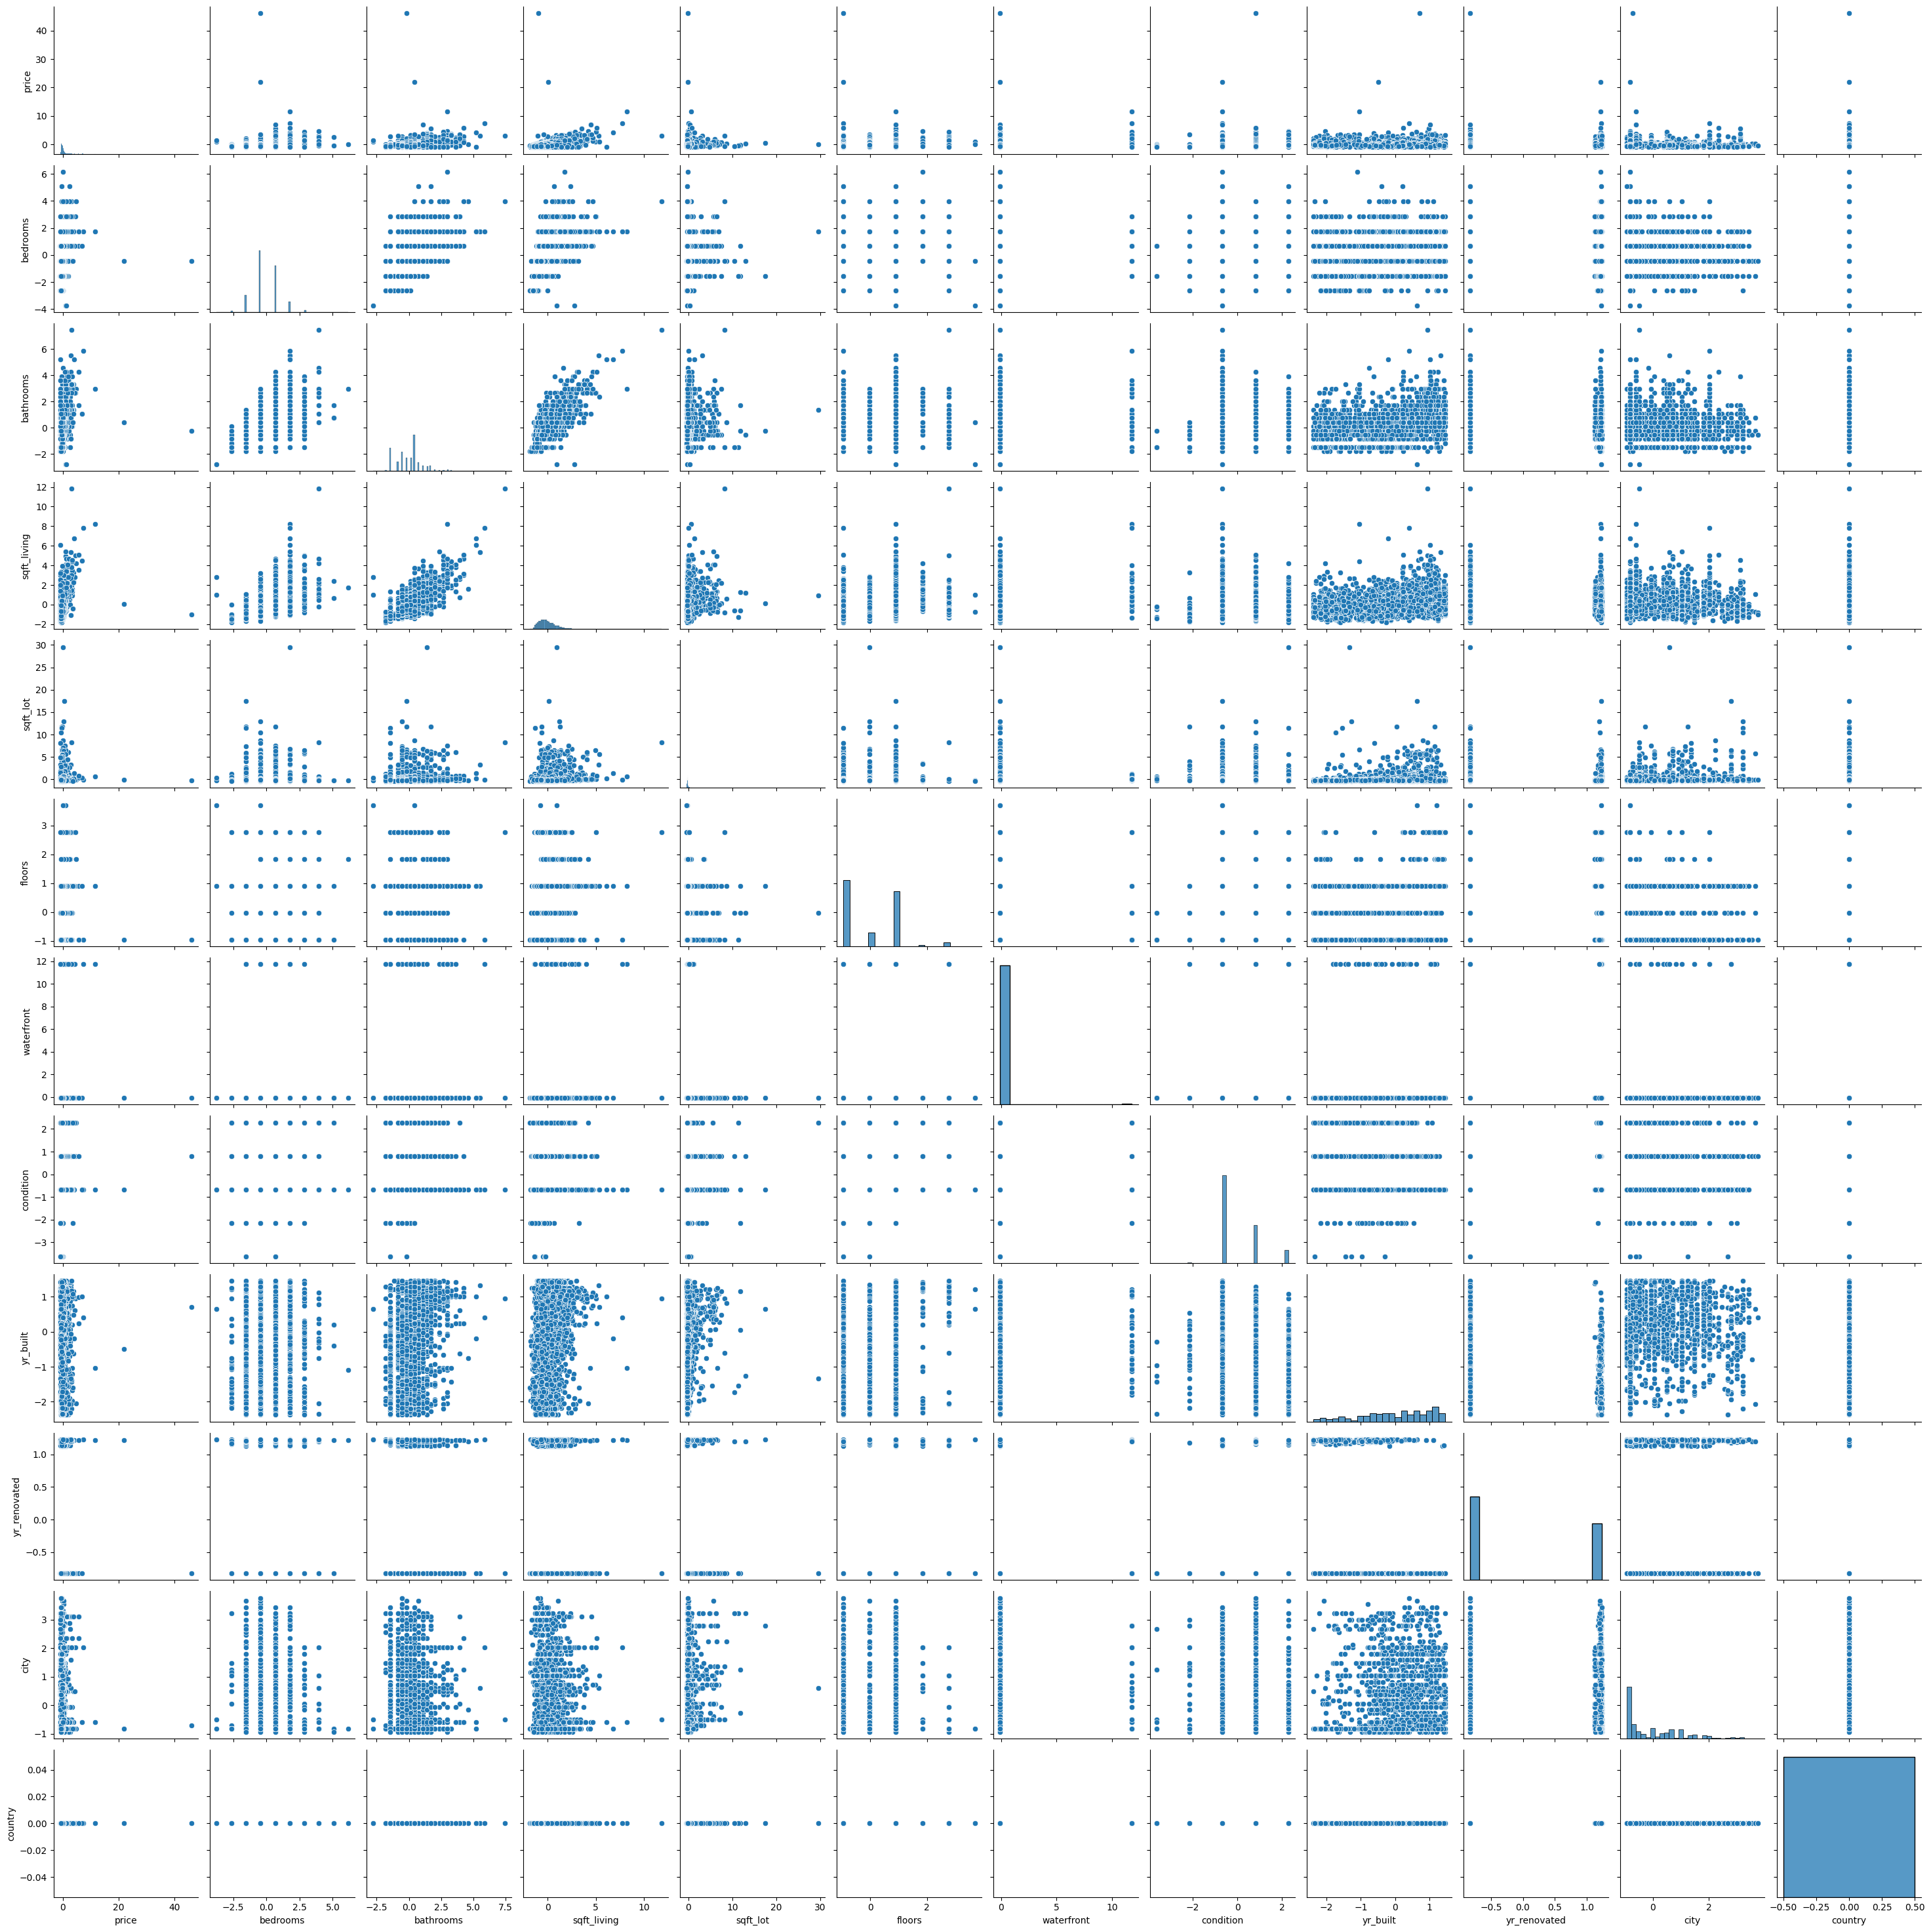

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'street', 'statezip'], axis=1, inplace=True)

In [ ]:
# converting the text data into the numerical form
df['city']= pd.factorize(df['city'])[0]
df['country']= pd.factorize(df['country'])[0]

<Axes: >

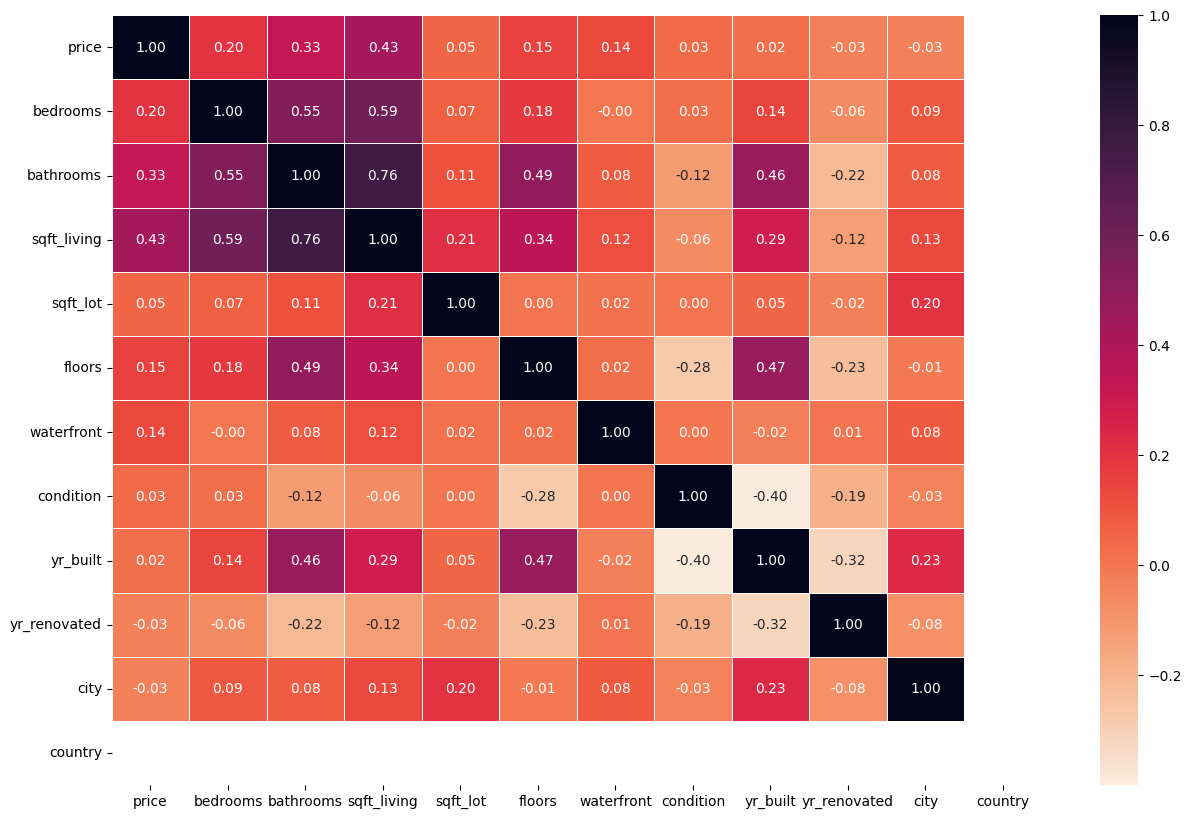

In [ ]:
correl = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correl, annot=True, cmap='rocket_r', linewidths=0.5, fmt='.2f')

In [ ]:
b=(df.columns)

In [ ]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

df=pd.DataFrame(df,columns=b)

In [ ]:
x = df.drop(columns='price',axis=1)
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
print("mse : ",mean_squared_error(y_test,y_pred))
print("rmse : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("mae : ",mean_absolute_error(y_test,y_pred))
print("test r2 score : ",r2_score(y_test,y_pred))

mse :  3.0996199789861105
rmse :  1.7605737641422783
mae :  0.3727794014033674
test r2 score :  0.03398717592732592


In [ ]:
print("Predicted vs True Prices:")
for pred, true in zip(y_pred[:10], y_test[:10]):
    print(f"Predicted: {pred:.2f}, True: {true:.2f}")

Predicted vs True Prices:
Predicted: -0.40, True: -0.01
Predicted: -0.53, True: -0.98
Predicted: 0.75, True: 2.06
Predicted: -0.02, True: -0.33
Predicted: -0.31, True: -0.49
Predicted: 0.17, True: 0.13
Predicted: -0.07, True: -0.18
Predicted: -0.19, True: -0.45
Predicted: -0.09, True: -0.24
Predicted: -0.13, True: 0.21
